In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import respy

# Single Phase Linear Solver

**1. Input Data**

Grid Properties:

In [4]:
xdelta = np.array([750,1000,1250])
ydelta = np.array([750,1000,1250])
zdelta = 20

Reservoir Rock Properties:

In [5]:
xperm = np.array([50,100,200,100,150,250,150,200,300])
yperm = xperm/2
zperm = xperm/10

In [6]:
poro = np.array([0.15,0.18,0.20,0.17,0.20,0.22,0.22,0.25,0.26])

Fluid Properties

In [7]:
visc = 5

**2. Gridding**

In [8]:
delta = respy.GridDelta(xdelta,ydelta,20)

In [9]:
delta.xdelta

array([ 750., 1000., 1250.])

In [10]:
delta.ydelta

array([ 750., 1000., 1250.])

In [11]:
delta.depths

array([1000.])

In [12]:
delta.dims

2

In [13]:
delta.grids.dims

2

In [14]:
delta.grids.volume

array([11250010.60135316, 15000014.13513754, 18750017.66892192,
       15000014.13513754, 20000018.84685005, 25000023.55856256,
       18750017.66892192, 25000023.55856256, 31250029.4482032 ])

In [15]:
delta.index

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [16]:
delta.table

array([[0, 1, 0, 3],
       [0, 2, 1, 4],
       [1, 2, 2, 5],
       [3, 4, 0, 6],
       [3, 5, 1, 7],
       [4, 5, 2, 8],
       [6, 7, 3, 6],
       [6, 8, 4, 7],
       [7, 8, 5, 8]])

**3. Property Calculation**

In [17]:
rock = respy.RRock(xperm,yperm=yperm,zperm=zperm,poro=poro)

In [18]:
rock.xperm

array([ 50., 100., 200., 100., 150., 250., 150., 200., 300.])

In [19]:
rock.yperm

array([ 25.,  50., 100.,  50.,  75., 125.,  75., 100., 150.])

In [20]:
rock.poro

array([0.15, 0.18, 0.2 , 0.17, 0.2 , 0.22, 0.22, 0.25, 0.26])

In [21]:
oil = respy.Fluid(visc=visc)

In [22]:
oil.visc

array([5.])

**4. Configuration**

In [23]:
time = respy.Time((1,)*5)

In [24]:
time.total

5.0

In [25]:
time.steps

array([1., 1., 1., 1., 1.])

In [26]:
time.nums

5

In [27]:
for index,current,step in time:
    print(index,current,step)

0 0.0 86400.0
1 86400.0 86400.0
2 172800.0 86400.0
3 259200.0 86400.0
4 345600.0 86400.0


In [28]:
w1 = respy.Well((0,),axis='z',radius=0.25,skin=2,press=4000)
w2 = respy.Well((7,8),axis='x',radius=0.25,skin=0,press=2000)

In [29]:
w2.index

(7, 8)

**5. Simulation**

In [30]:
solver = respy.BaseSolver(delta.grids,rock,oil,tcomp=1e-5)

In [31]:
vec = solver.vector(5*24*60*60,wells=(w1,w2))

In [32]:
vec.X

array([1.51878975, 2.33659961, 3.57362293, 4.33939927, 6.32829061,
       6.90358975])

In [33]:
vec.Y

array([0.75939487, 1.78681147, 4.08276813, 1.03553846, 1.9597287 ,
       3.87446364])

In [34]:
vec.Z

array([], dtype=float64)

In [35]:
vec.A/1e-5

array([ 337500.0324 ,  540000.05184,  750000.072  ,  510000.04896,
        800000.0768 , 1100000.1056 ,  825000.0792 , 1250000.12   ,
       1625000.156  ])

In [36]:
vec.W

[array([0.66931877]), array([ 58.5849729 , 109.84682418])]

In [37]:
A = solver.Amat(vec).todense()*(3.28084**3)*(24*60*60)*6894.76/1e-5; A

matrix([[ 337500.0324 ,       0.     ,       0.     ,       0.     ,
               0.     ,       0.     ,       0.     ,       0.     ,
               0.     ],
        [      0.     ,  540000.05184,       0.     ,       0.     ,
               0.     ,       0.     ,       0.     ,       0.     ,
               0.     ],
        [      0.     ,       0.     ,  750000.072  ,       0.     ,
               0.     ,       0.     ,       0.     ,       0.     ,
               0.     ],
        [      0.     ,       0.     ,       0.     ,  510000.04896,
               0.     ,       0.     ,       0.     ,       0.     ,
               0.     ],
        [      0.     ,       0.     ,       0.     ,       0.     ,
          800000.0768 ,       0.     ,       0.     ,       0.     ,
               0.     ],
        [      0.     ,       0.     ,       0.     ,       0.     ,
               0.     , 1100000.1056 ,       0.     ,       0.     ,
               0.     ],
        [      0.     

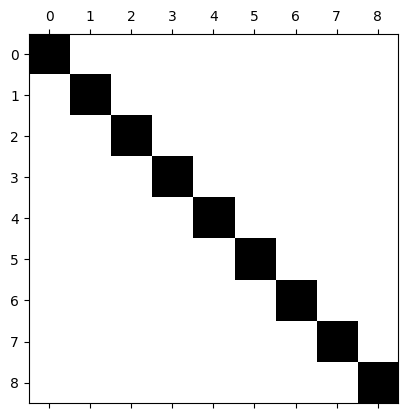

In [38]:
plt.spy(A); plt.show()

In [39]:
T = solver.Tmat(vec).todense()*(3.28084**3)*(24*60*60)*6894.76; T

matrix([[ 2.27818462, -1.51878975,  0.        , -0.75939487,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ],
        [-1.51878975,  5.64220082, -2.33659961,  0.        , -1.78681147,
          0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        , -2.33659961,  6.41936774,  0.        ,  0.        ,
         -4.08276813,  0.        ,  0.        ,  0.        ],
        [-0.75939487,  0.        ,  0.        ,  5.36855627, -3.57362293,
          0.        , -1.03553846,  0.        ,  0.        ],
        [ 0.        , -1.78681147,  0.        , -3.57362293, 11.65956237,
         -4.33939927,  0.        , -1.9597287 ,  0.        ],
        [ 0.        ,  0.        , -4.08276813,  0.        , -4.33939927,
         12.29663104,  0.        ,  0.        , -3.87446364],
        [ 0.        ,  0.        ,  0.        , -1.03553846,  0.        ,
          0.        ,  7.36382907, -6.32829061,  0.        ],
        [ 0.        ,  0.        ,  0.        , 

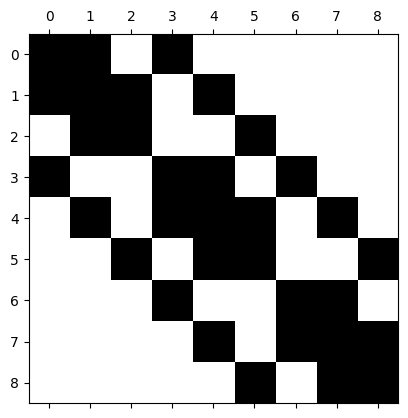

In [40]:
plt.spy(T); plt.show()

In [41]:
vec.W

[array([0.66931877]), array([ 58.5849729 , 109.84682418])]

In [42]:
J = solver.Jmat(vec).todense()*(3.28084**3)*(24*60*60)*6894.76; J

matrix([[  0.66931877,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ,
           0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           

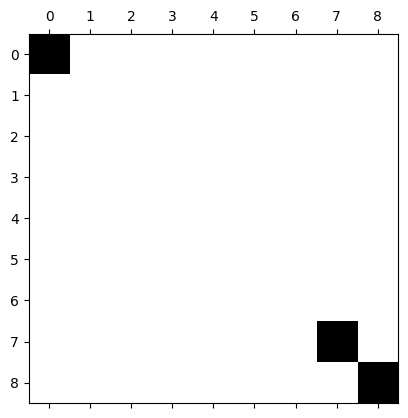

In [43]:
plt.spy(J); plt.show()

In [44]:
Q = solver.Qmat(vec).todense()*(3.28084**3)*(24*60*60); Q

matrix([[  2677.27509522],
        [     0.        ],
        [     0.        ],
        [     0.        ],
        [     0.        ],
        [     0.        ],
        [     0.        ],
        [117169.94579205],
        [219693.64836009]])

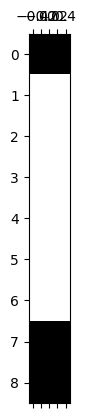

In [45]:
plt.spy(Q); plt.show()

6. Post-Processing